In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Nucleation_Dynamics as nd
from extensisq import BS5, SSV2stab, Pr9, CK5, CFMR7osc
import scienceplots

In [2]:
plt.style.use(['science', 'ieee'])

In [3]:
# Chromium 

# Ejemplo de uso de la clase
params = {
    'temperature': 668,
    'activation_energy': 52920.2,
    'diffusivity_factor': 2e-9,
    'jump_distance': 4.6e-10,
    'molar_mass': 51.9961,
    'mass_density': 7.19,
    'melting_point': 2130,
    'heat_fusion': 20.48 * 1e3,
    'supersaturation_ratio': 1.1,
    'sigma': 3.98, 
    'method': 'melting'
}

cluster_physics = nd.ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules}")


Critical radius: 4.095031305614689e-09 meter
Critical Gibbs free energy: 2.795671465444912e-16 joule
Critical number of atoms: 23953.518778982874 dimensionless


In [3]:
# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 59920.2,
    'diffusivity_factor': 2e-9,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.15, 
    'method': 'melting'
}

cluster_physics = nd.ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules}")


Critical radius: 8.184545454545456e-10 meter
Critical Gibbs free energy: 4.2089037887339014e-19 joule
Critical number of atoms: 23.04237422754489 dimensionless


In [4]:
MAX_NUMBER_MOLECULES = 40
number_clusters_start = 2
dt = 1e-8/cluster_physics.unbiased_jump_rate.magnitude
dt = dt*1e4

In [5]:
sim = nd.ScipyClusterDynamics(params,int(1e6),dt, number_clusters_start, MAX_NUMBER_MOLECULES)
sim.simulate()

Computation time: 7.6567 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-50.0, -20.0)

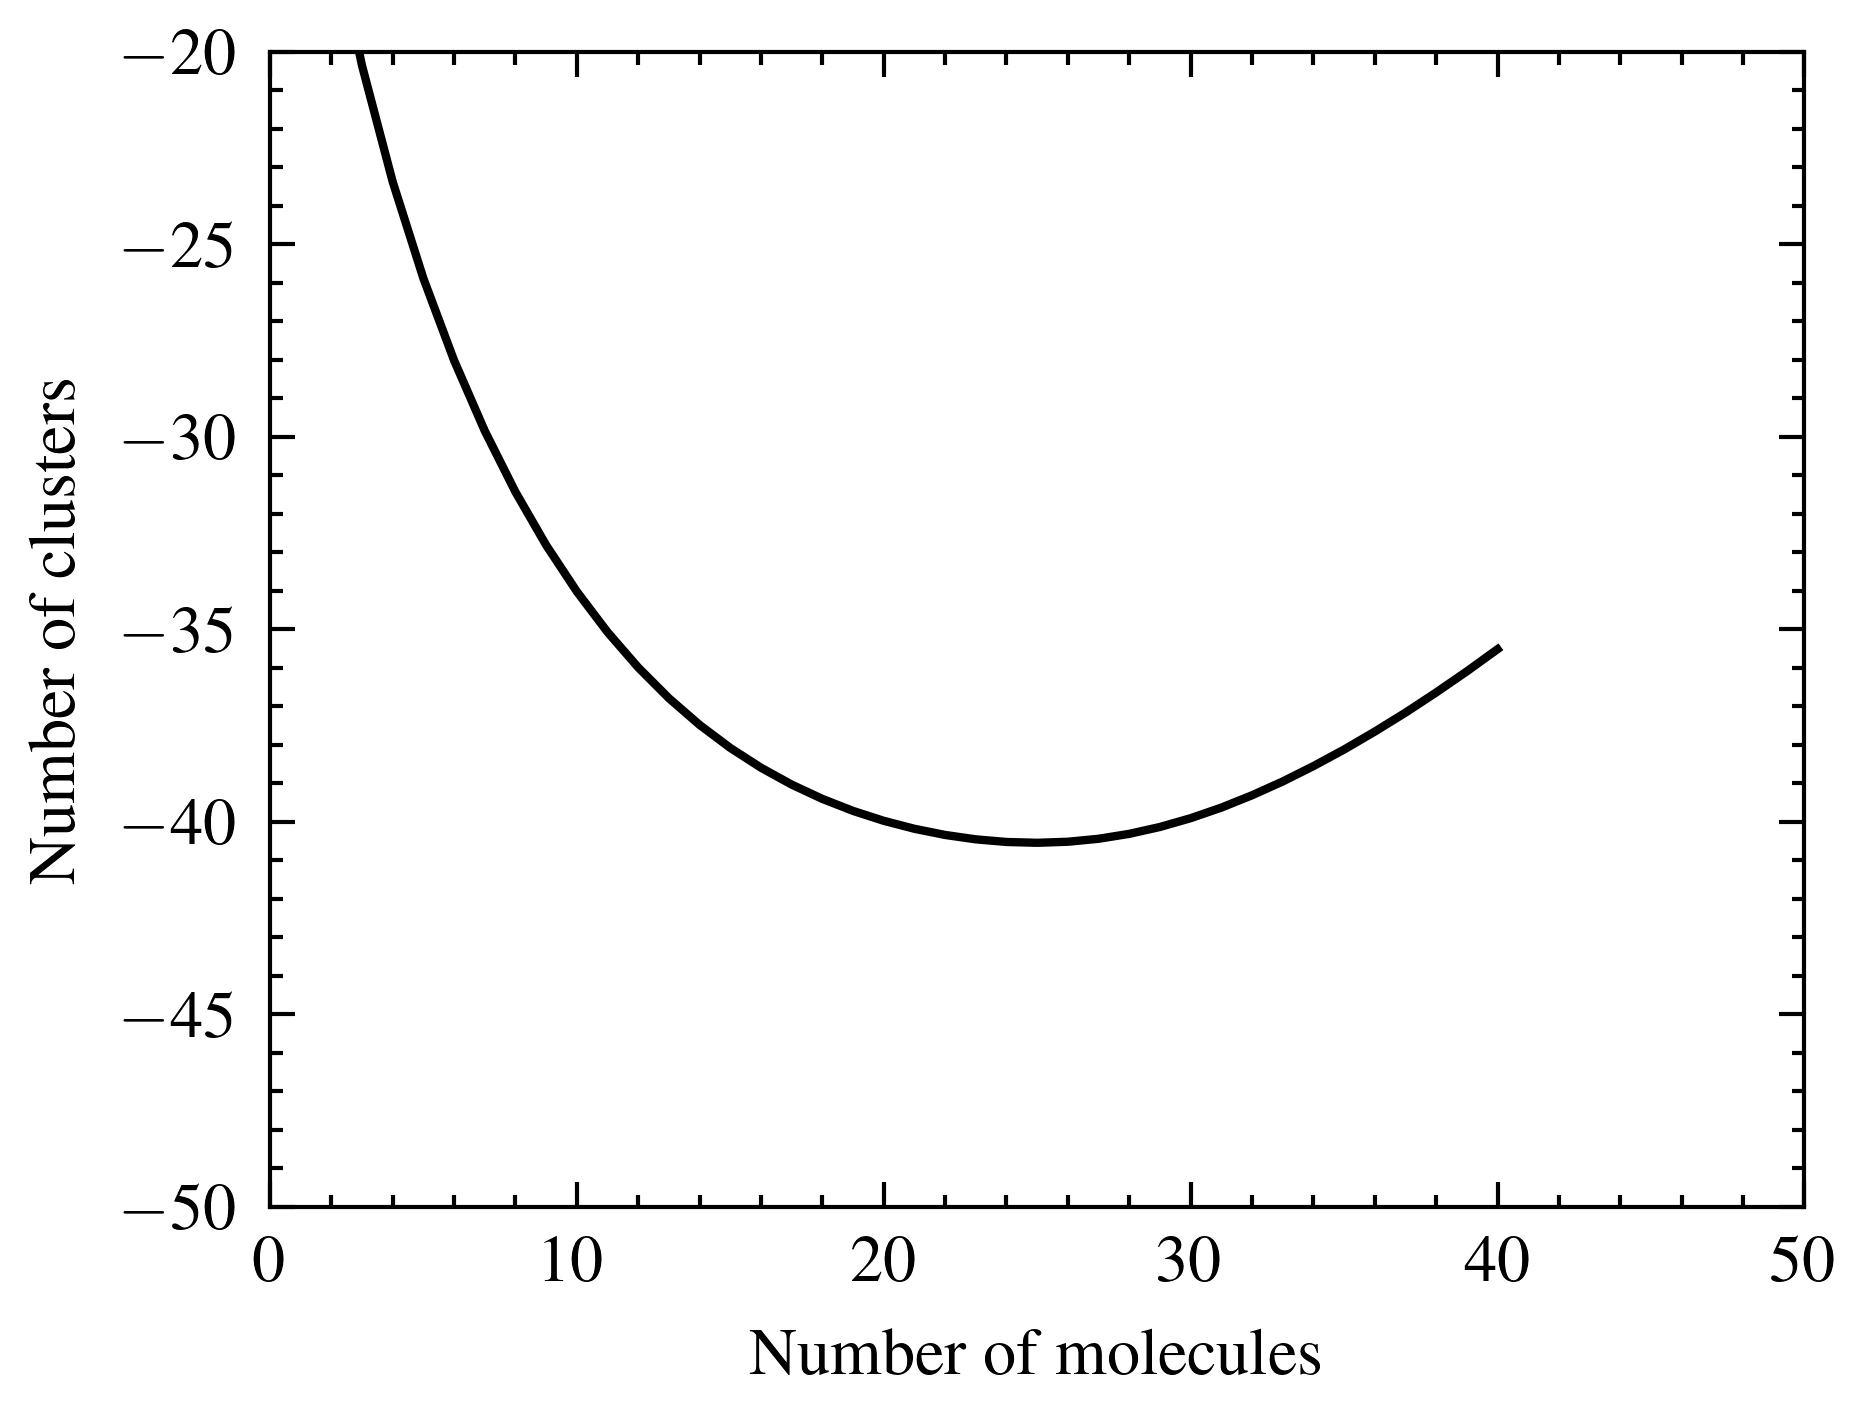

In [6]:
plt.figure()
n = np.linspace(1,1000,1000)
plt.plot(sim.number_molecules_array,np.log(sim.cluster_array[:,-1]/cluster_physics.AVOGADRO.magnitude))
#plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')
plt.xlim(0,50)
plt.ylim(-50,-20)

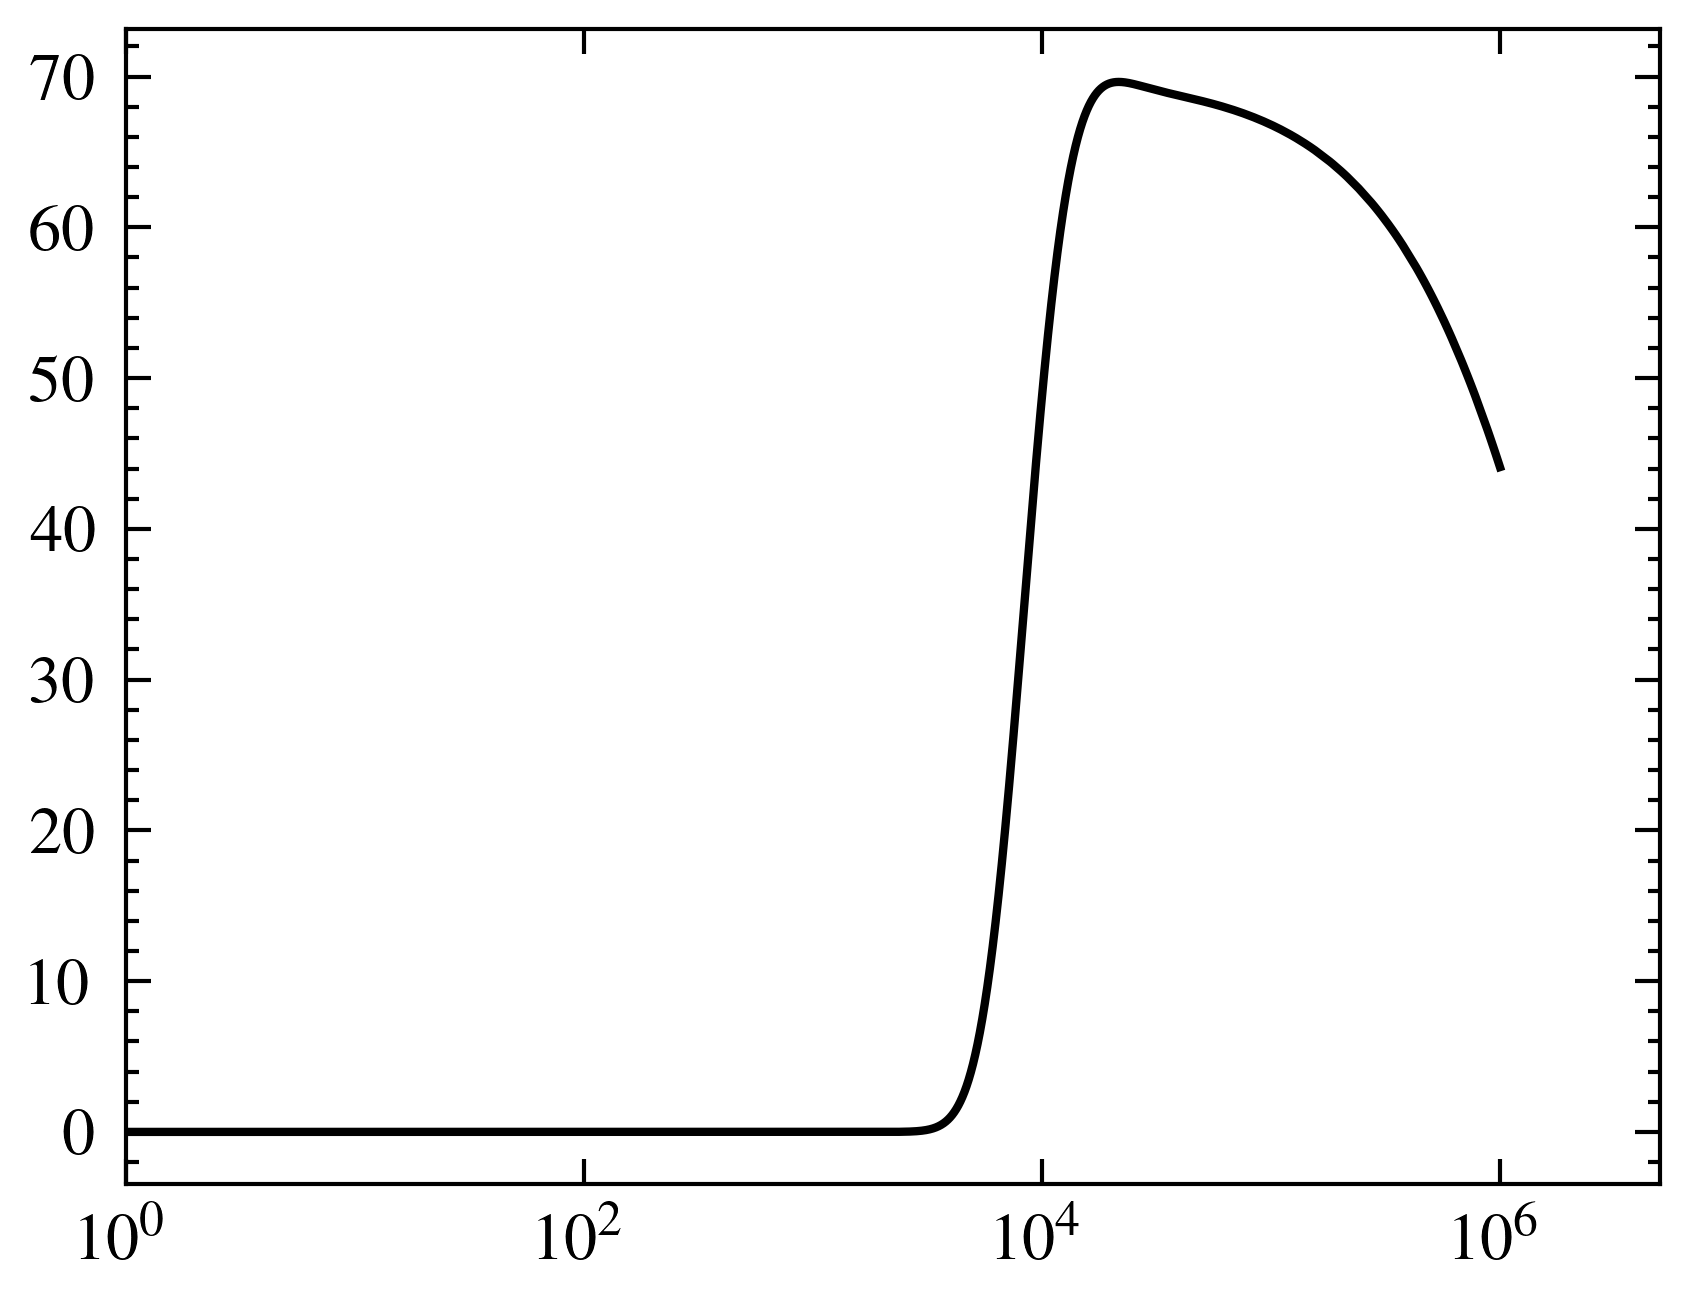

In [9]:
plt.figure()
#plt.plot(sim.rates_evolution.sum(axis=0))
plt.plot(1e-5*sim.dydt_array[22:, :].sum(axis=0)/cluster_physics.unbiased_jump_rate.magnitude)
#plt.axhline(y = steady_state, color = 'green', linestyle = '--')
#plt.yscale('log')
plt.xlim(1,5e6)
plt.xscale('log')
#plt.yscale('log')
#plt.yscale('log')

In [5]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e3),int(5e3), int(1e4),int(5e4), int(1e6)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = nd.ScipyClusterDynamics(params,ts,dt, number_clusters_start, MAX_NUMBER_MOLECULES)
    sim.simulate()
    x = sim.number_molecules_array
    y = sim.cluster_array[:,-1]
    x_array.append(x)
    y_array.append(y)

Computation time: 0.0337 seconds
Computation time: 0.0521 seconds
Computation time: 0.1762 seconds
Computation time: 1.0776 seconds
Computation time: 29.4072 seconds


/tmp/ipykernel_8295/967383811.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_array[i],np.log(y_array[i]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
/tmp/ipykernel_8295/967383811.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(x_array[i],np.log(y_array[i]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))


(-50.0, -20.0)

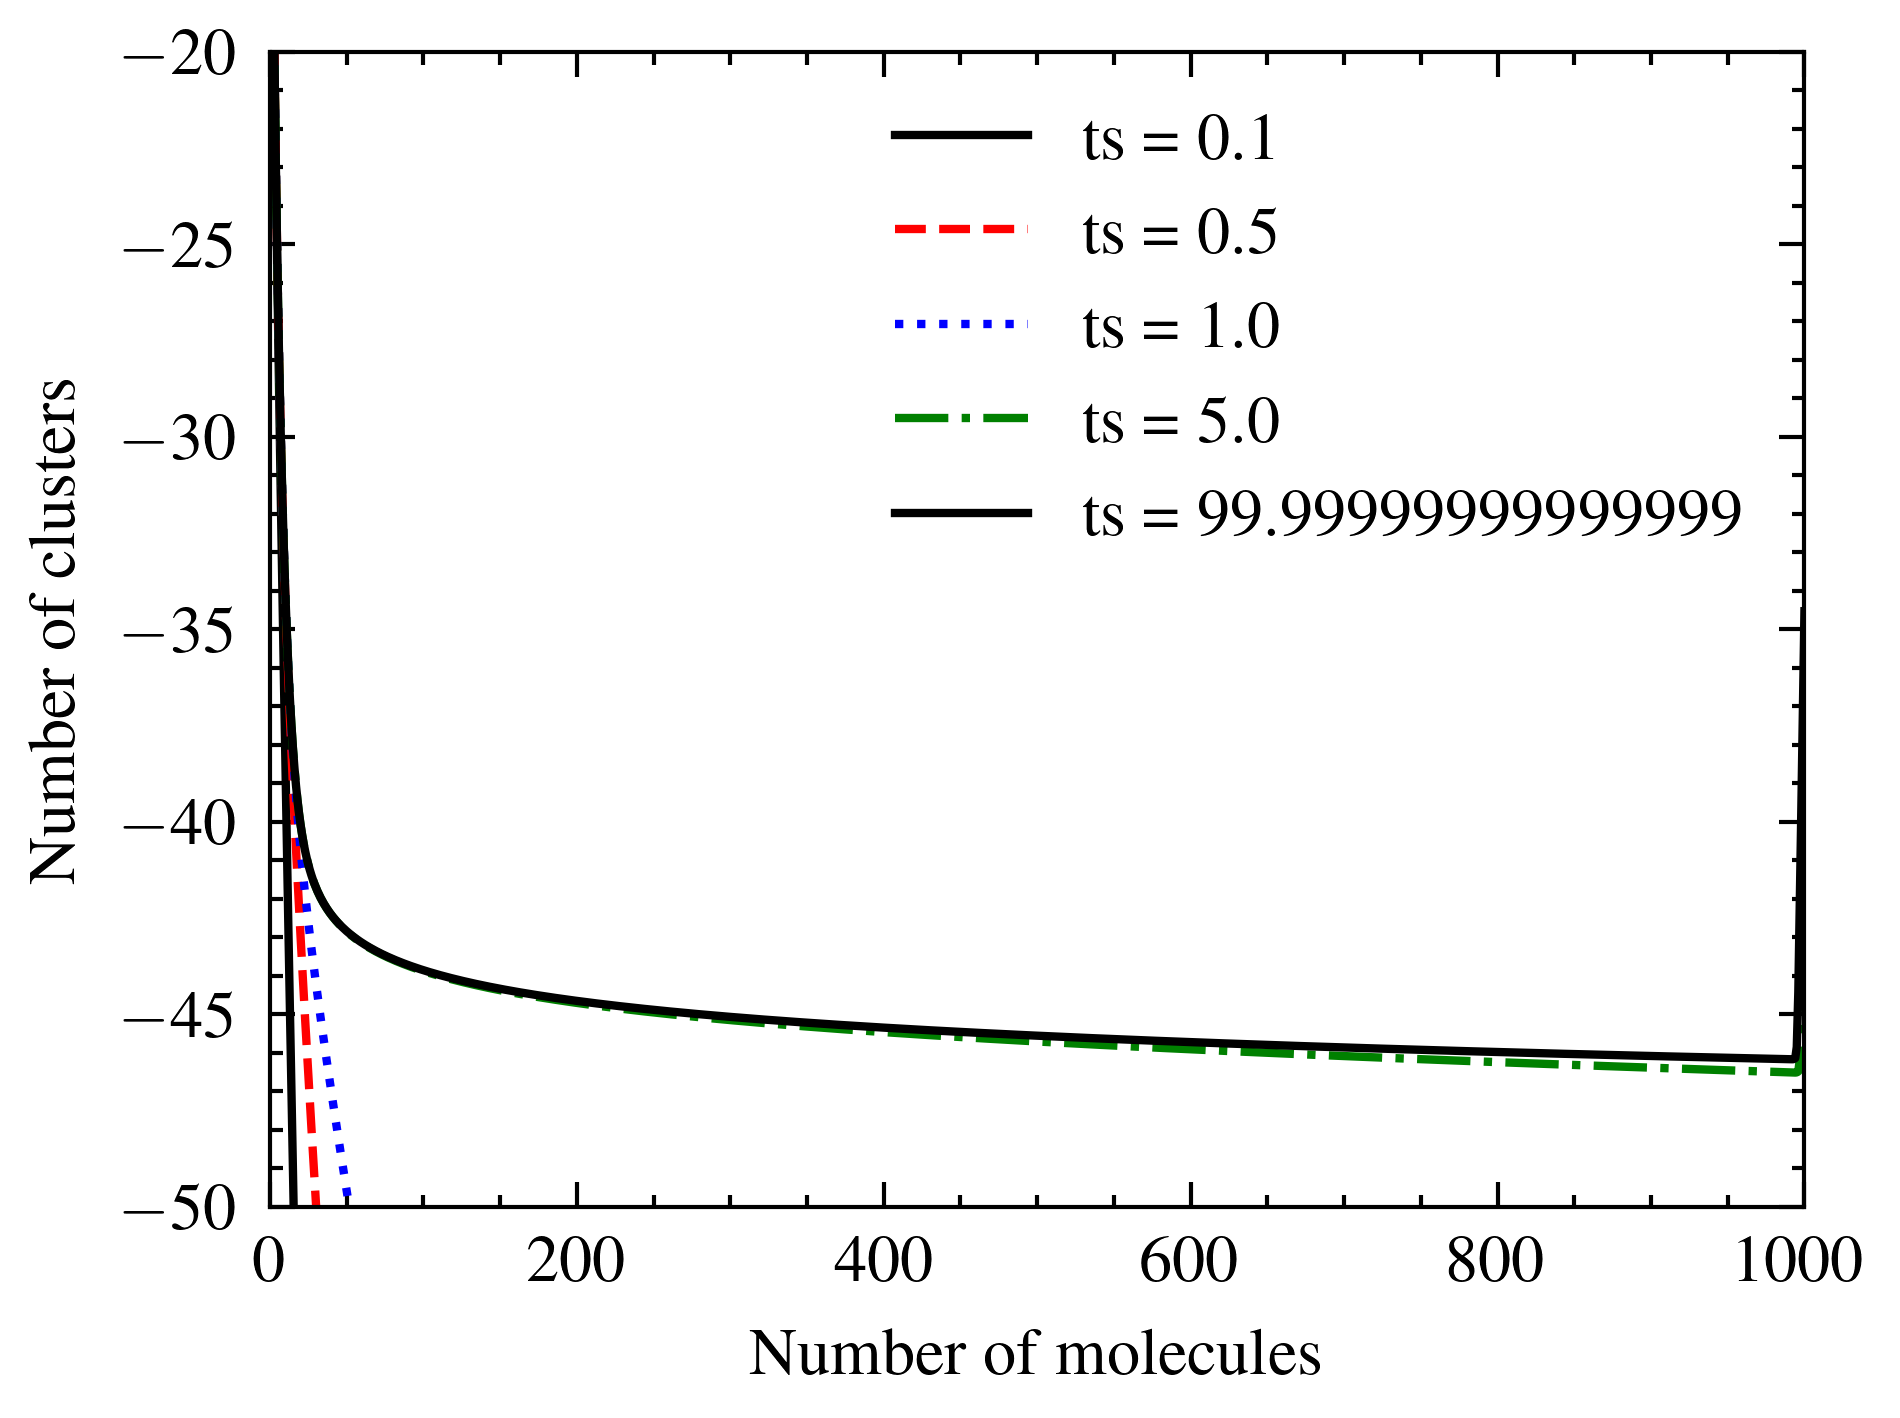

In [6]:
plt.figure()
n = np.linspace(1,1000,1000)
for i in range(len(time_step_array)):
    plt.plot(x_array[i],np.log(y_array[i]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
#plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')
plt.xlim(0,1000)
plt.ylim(-50,-20)

In [5]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e3),int(5e3), int(1e4),int(5e4), int(1e6)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = nd.OpenClusterDynamics(params,ts,dt, number_clusters_start, MAX_NUMBER_MOLECULES, record_frequency=5)
    sim.simulate()
    x = sim.number_molecules_array
    y = sim.cluster_evolution[:,-1]
    x_array.append(x)
    y_array.append(y)

Computation time: 1.6886 seconds
Computation time: 0.2698 seconds
Computation time: 0.4434 seconds
Computation time: 2.2021 seconds
Computation time: 33.2245 seconds


/tmp/ipykernel_9375/967383811.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_array[i],np.log(y_array[i]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))


(-50.0, -20.0)

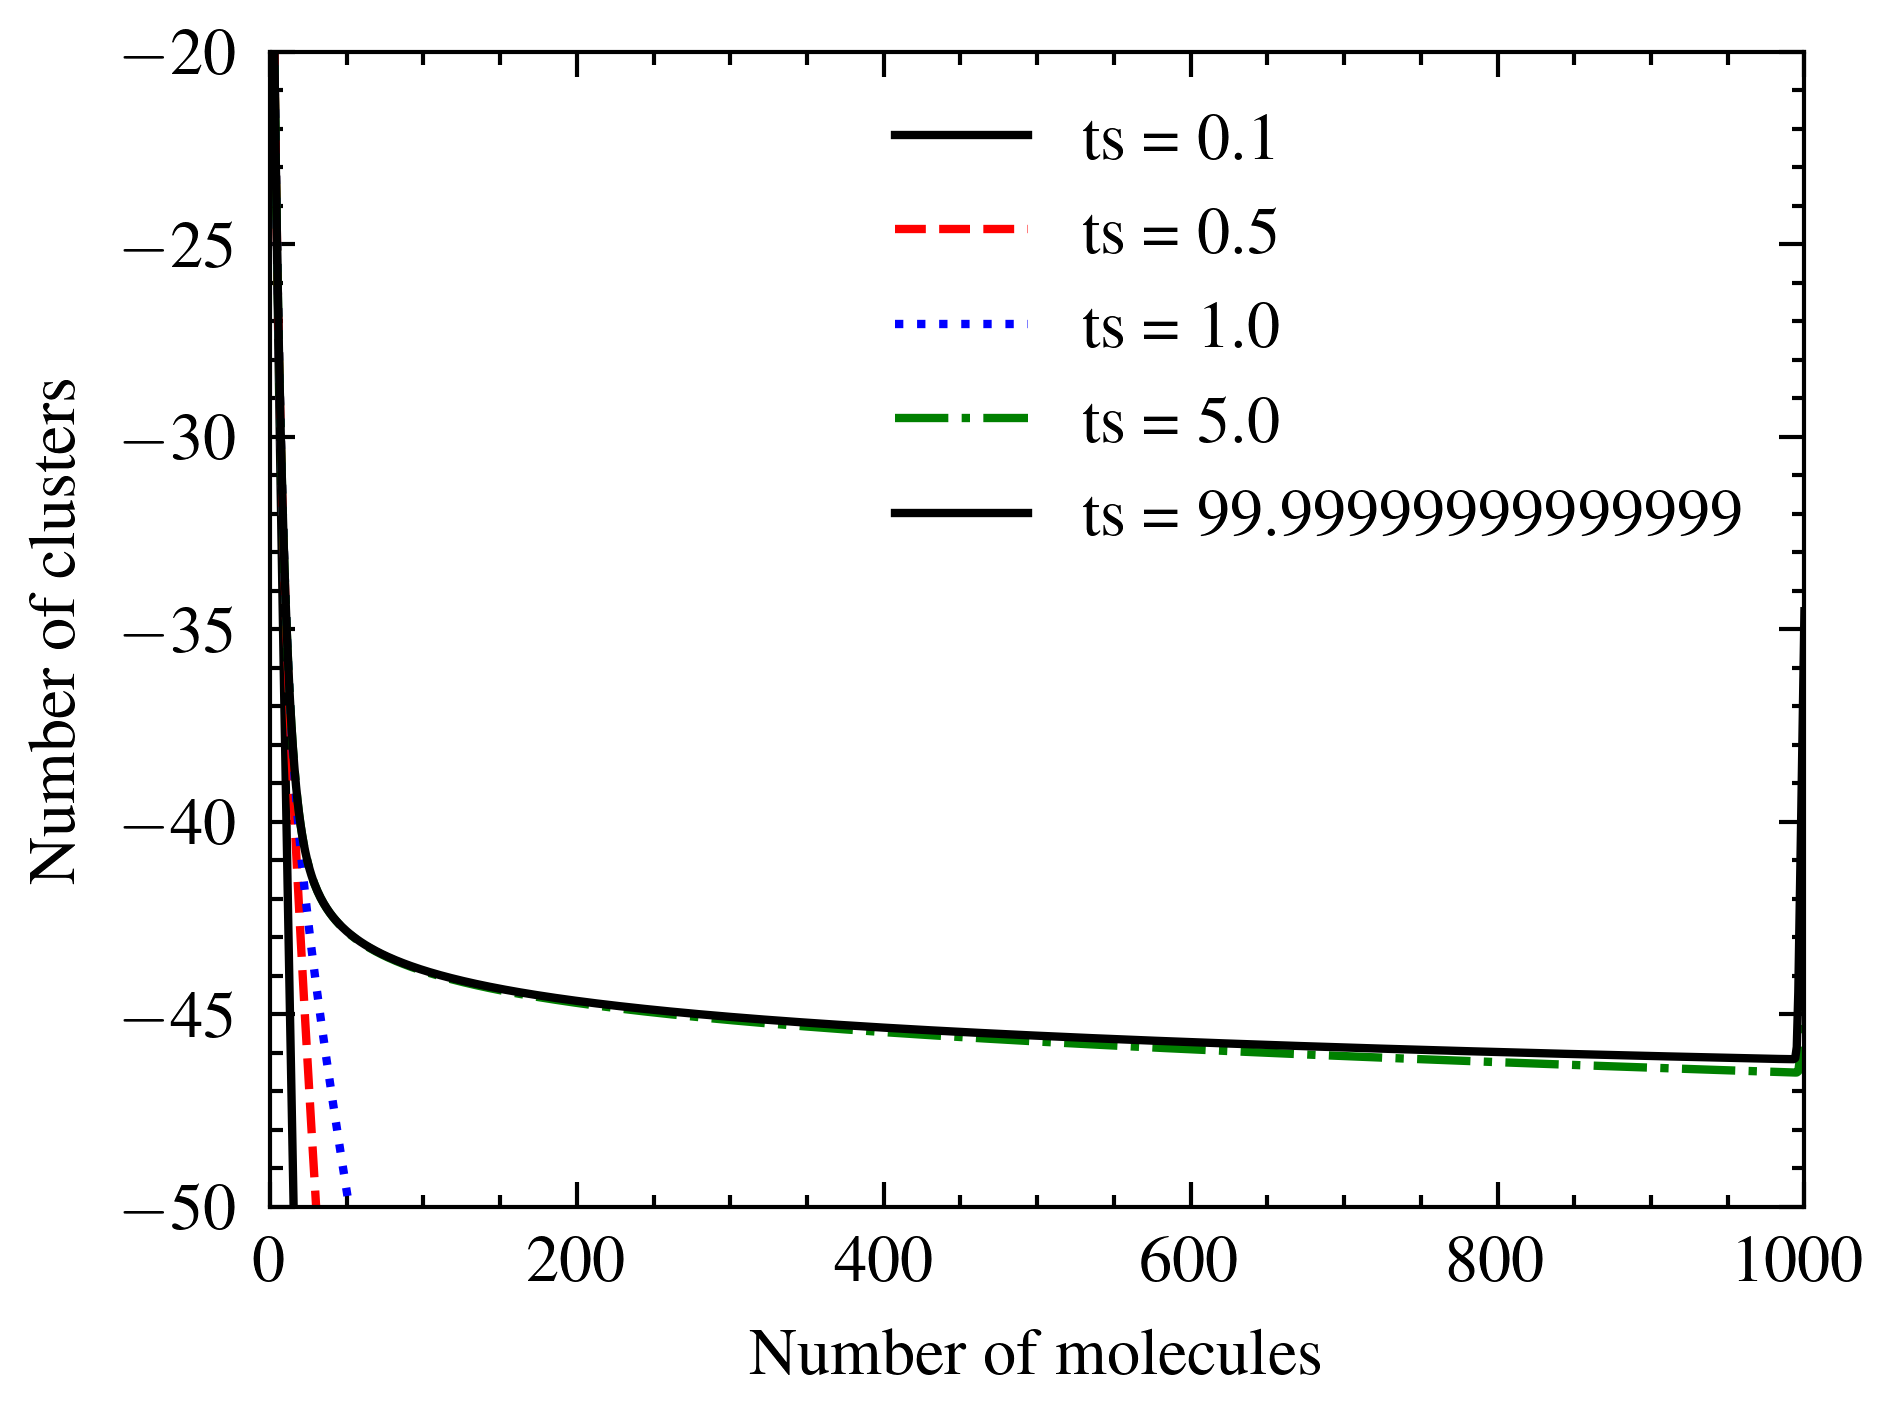

In [8]:
plt.figure()
n = np.linspace(1,1000,1000)
for i in range(len(time_step_array)):
    plt.plot(x_array[i],np.log(y_array[i]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
#plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')
plt.xlim(0,1000)
plt.ylim(-50,-20)

In [13]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e3),int(5e3), int(1e4),int(5e4), int(1e6)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = nd.ClusterDynamicsClosed(params,ts,dt, number_clusters_start, MAX_NUMBER_MOLECULES, record_frequency=5)
    sim.simulate()
    x = sim.number_molecules_array
    y = sim.cluster_evolution[:,-1]
    x_array.append(x)
    y_array.append(y)

Computation time: 1.6826 seconds
Computation time: 0.0667 seconds
Computation time: 0.1367 seconds
Computation time: 0.6975 seconds


(-50.0, -20.0)

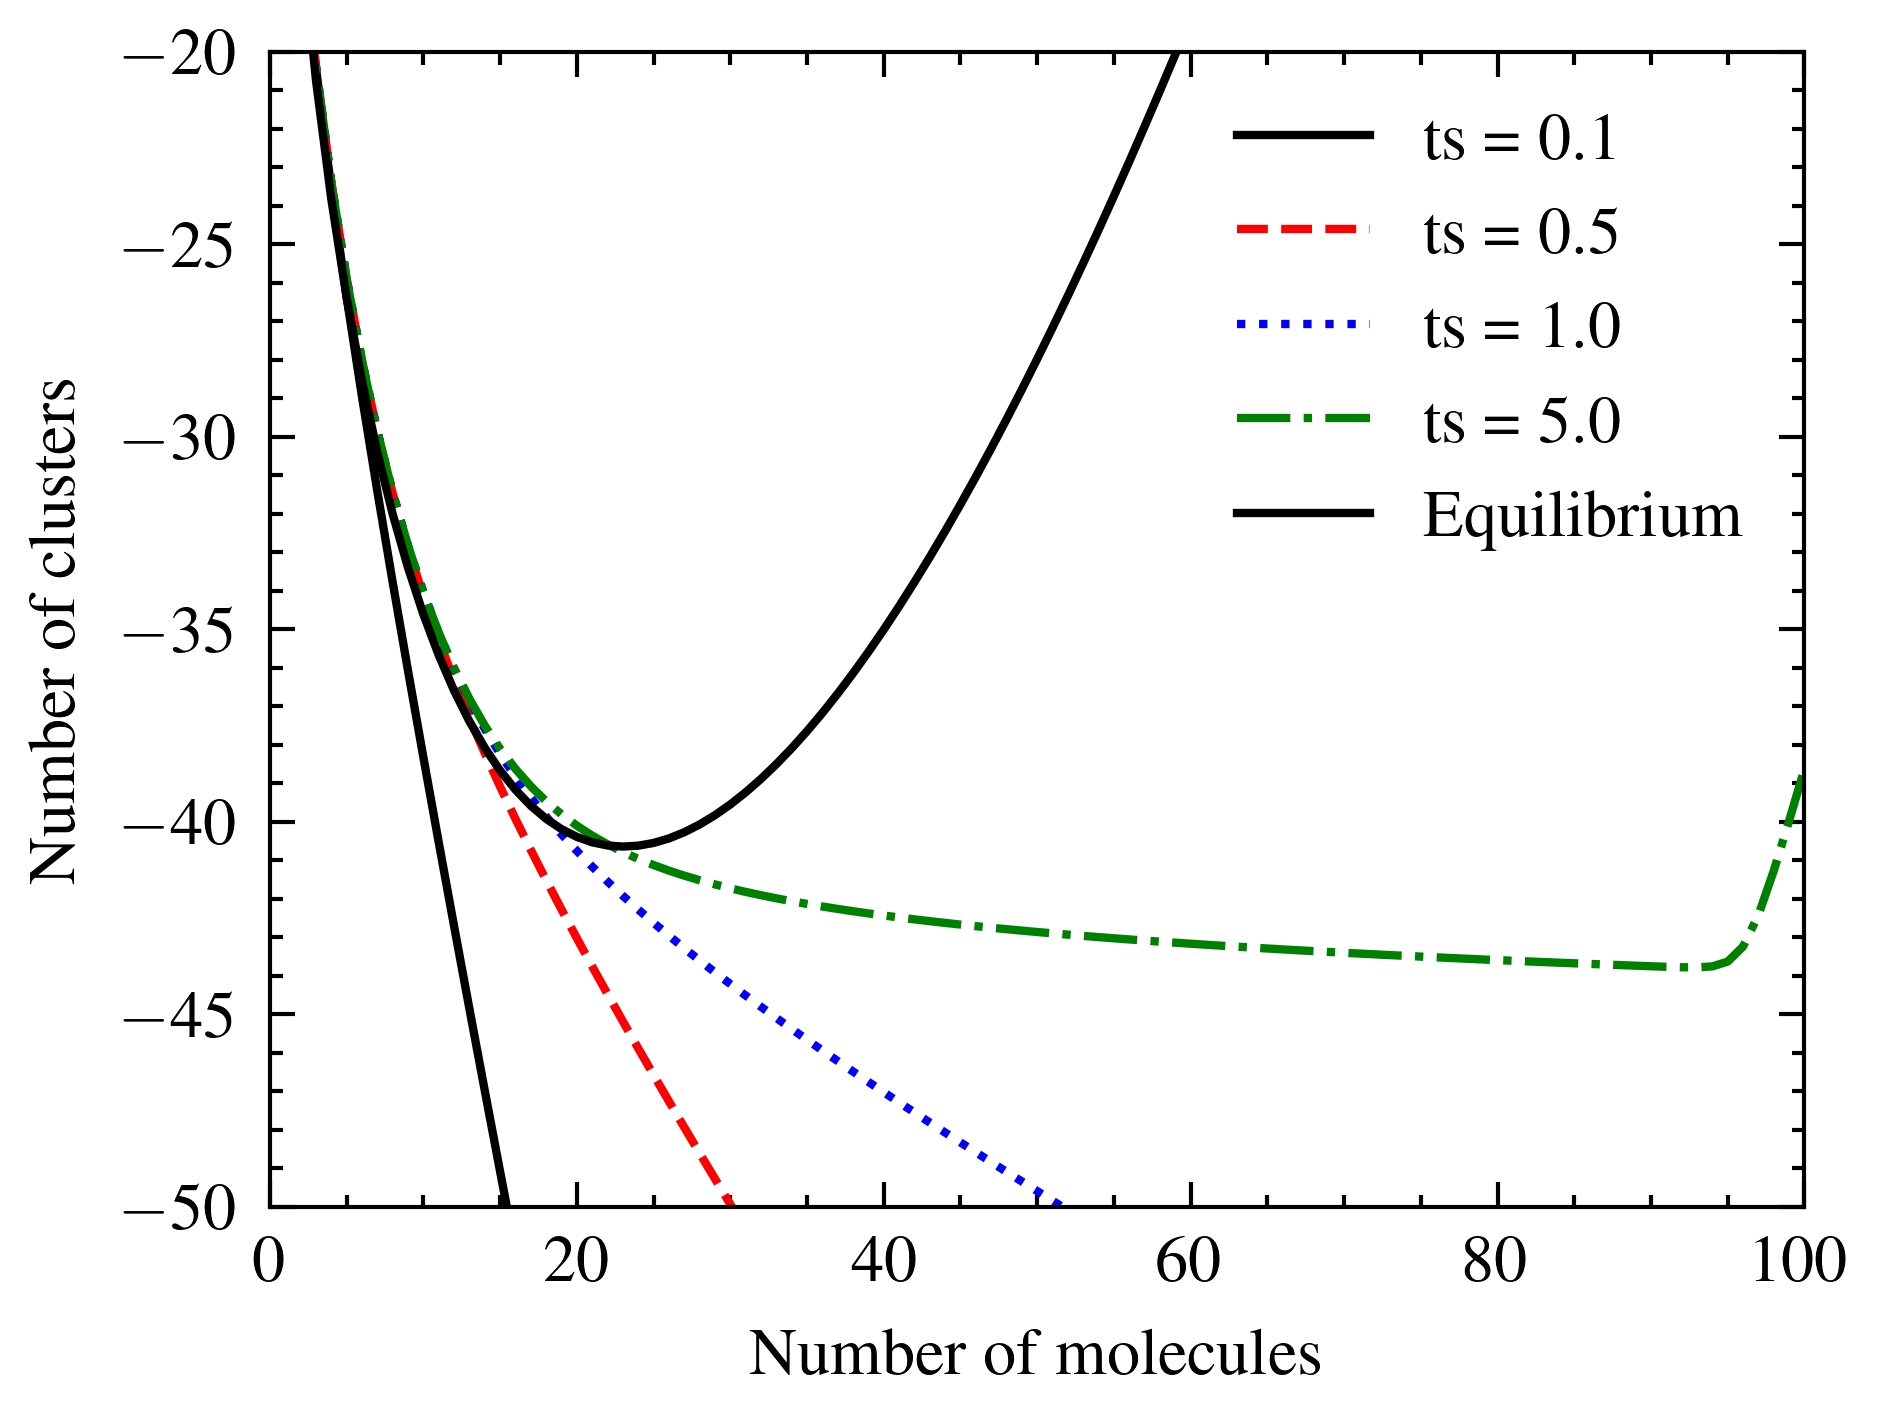

In [14]:
plt.figure()
n = np.linspace(1,100,100)
for i in range(len(time_step_array)):
    plt.plot(x_array[i],np.log(y_array[i]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')
plt.xlim(0,100)
plt.ylim(-50,-20)

In [7]:
#With Numba 

""" 
# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 59920.2,
    'diffusivity_factor': 2e-9,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.15, 
    'method': 'melting'
}

Computation time: 1.4030 seconds
Computation time: 0.0169 seconds
Computation time: 0.1812 seconds
Computation time: 0.8422 seconds
 """

 # Without Numba
""" 
Computation time: 0.0014 seconds
Computation time: 0.0812 seconds
Computation time: 0.8159 seconds
Computation time: 4.1370 seconds 
"""

' \nComputation time: 0.0014 seconds\nComputation time: 0.0812 seconds\nComputation time: 0.8159 seconds\nComputation time: 4.1370 seconds \n'

In [6]:
steady_state = sim.compute_analytical_steady_state()

(-50.0, -20.0)

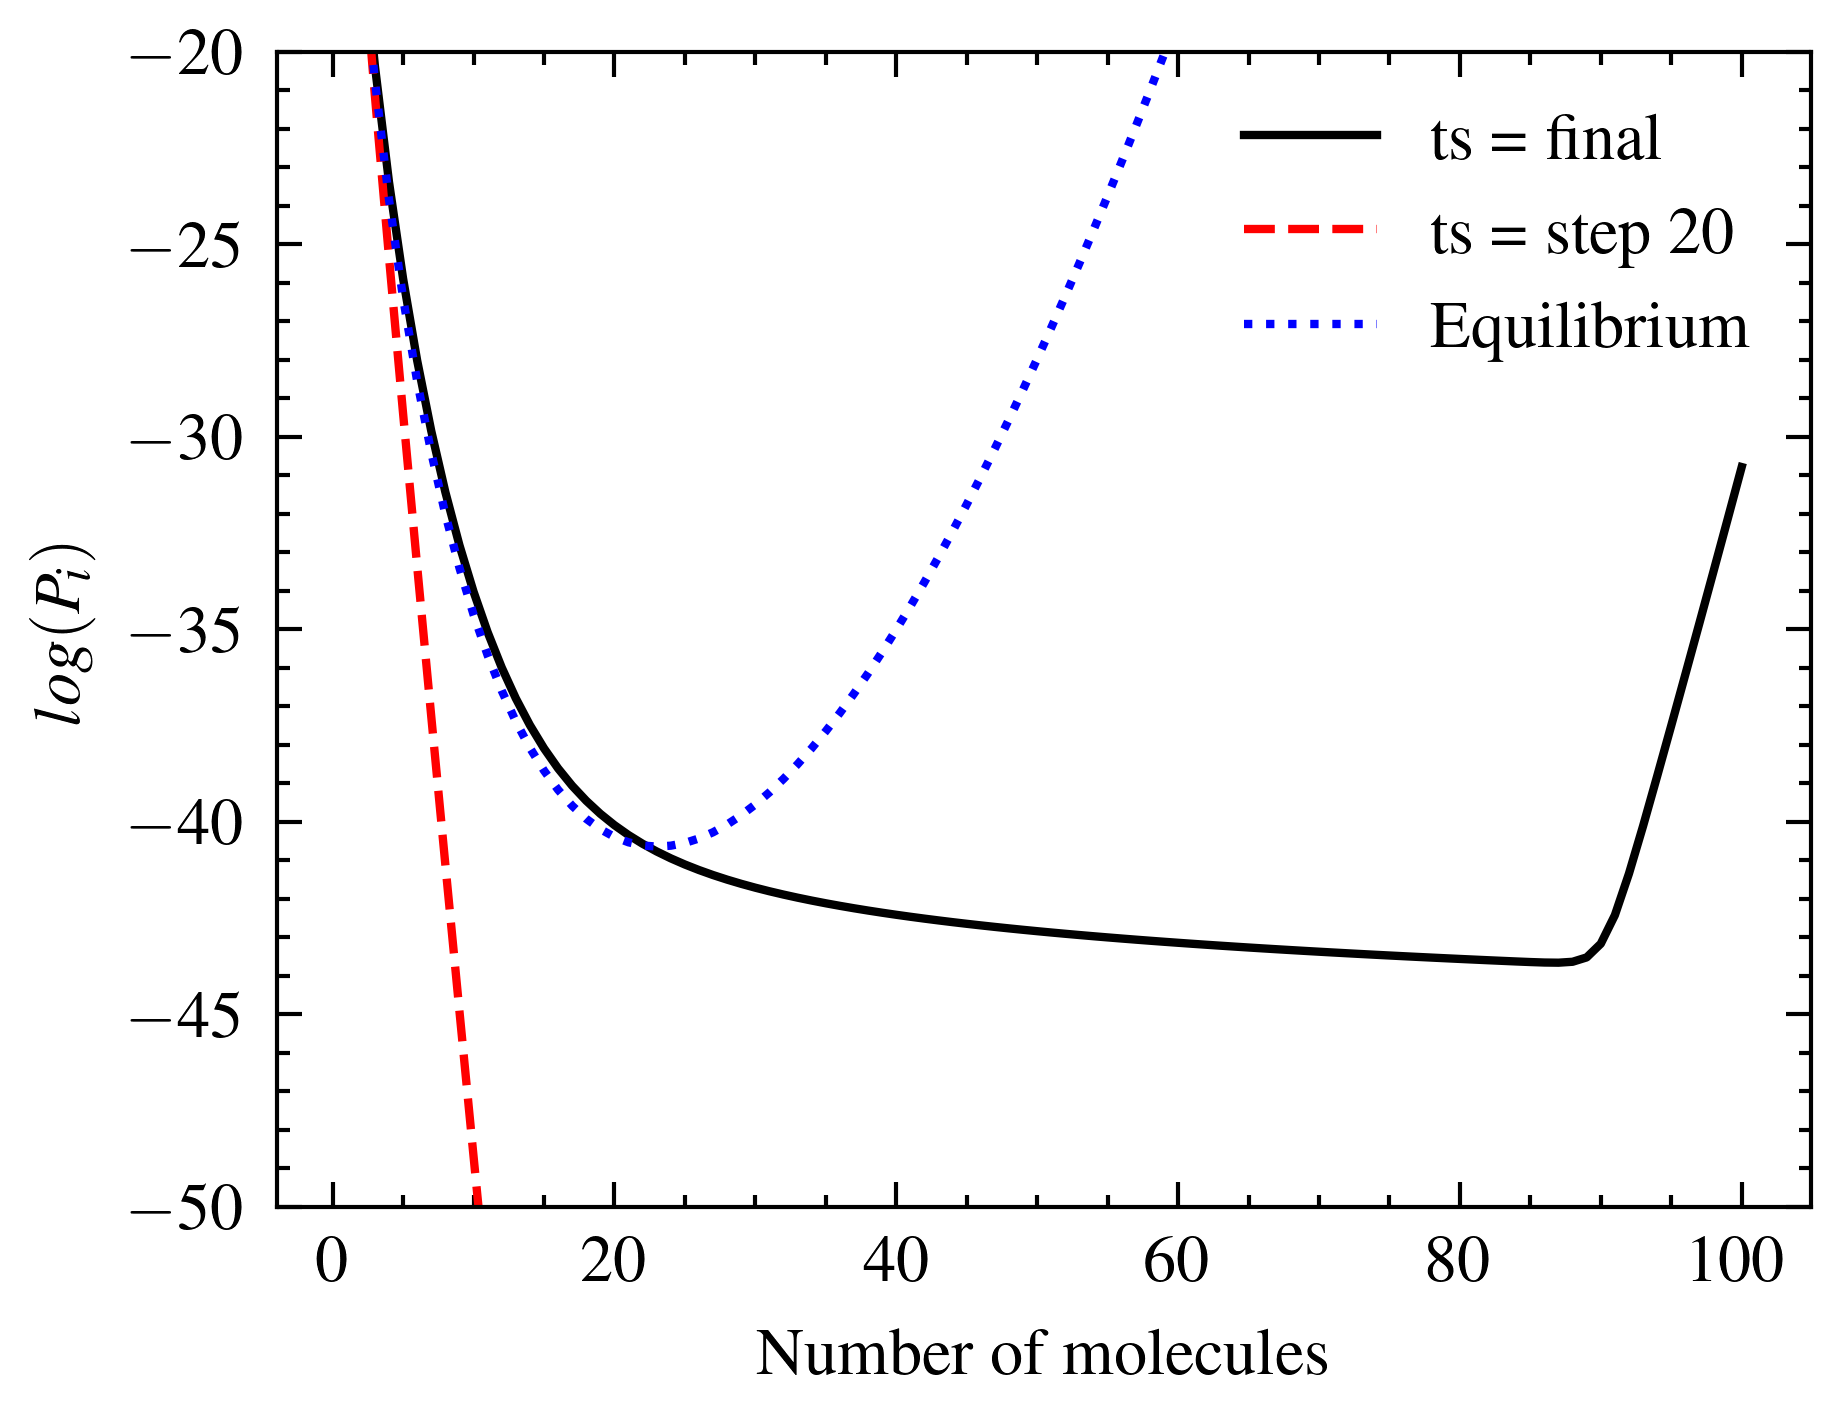

In [8]:

plt.figure()
n = np.linspace(1,100,100)
plt.plot(sim.number_molecules_array,np.log(sim.cluster_array[:,-1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = final')
plt.plot(sim.number_molecules_array,np.log(sim.cluster_array[:,20]/cluster_physics.AVOGADRO.magnitude), label = 'ts = step 20')
    #plt.plot(x_array[i],np.log(sim.cluster_evolution[:,100]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))

plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel(r'$log(P_i)$')
#plt.xlim(1,MAX_NUMBER_MOLECULES)
plt.ylim(-50,-20)


(-50.0, -20.0)

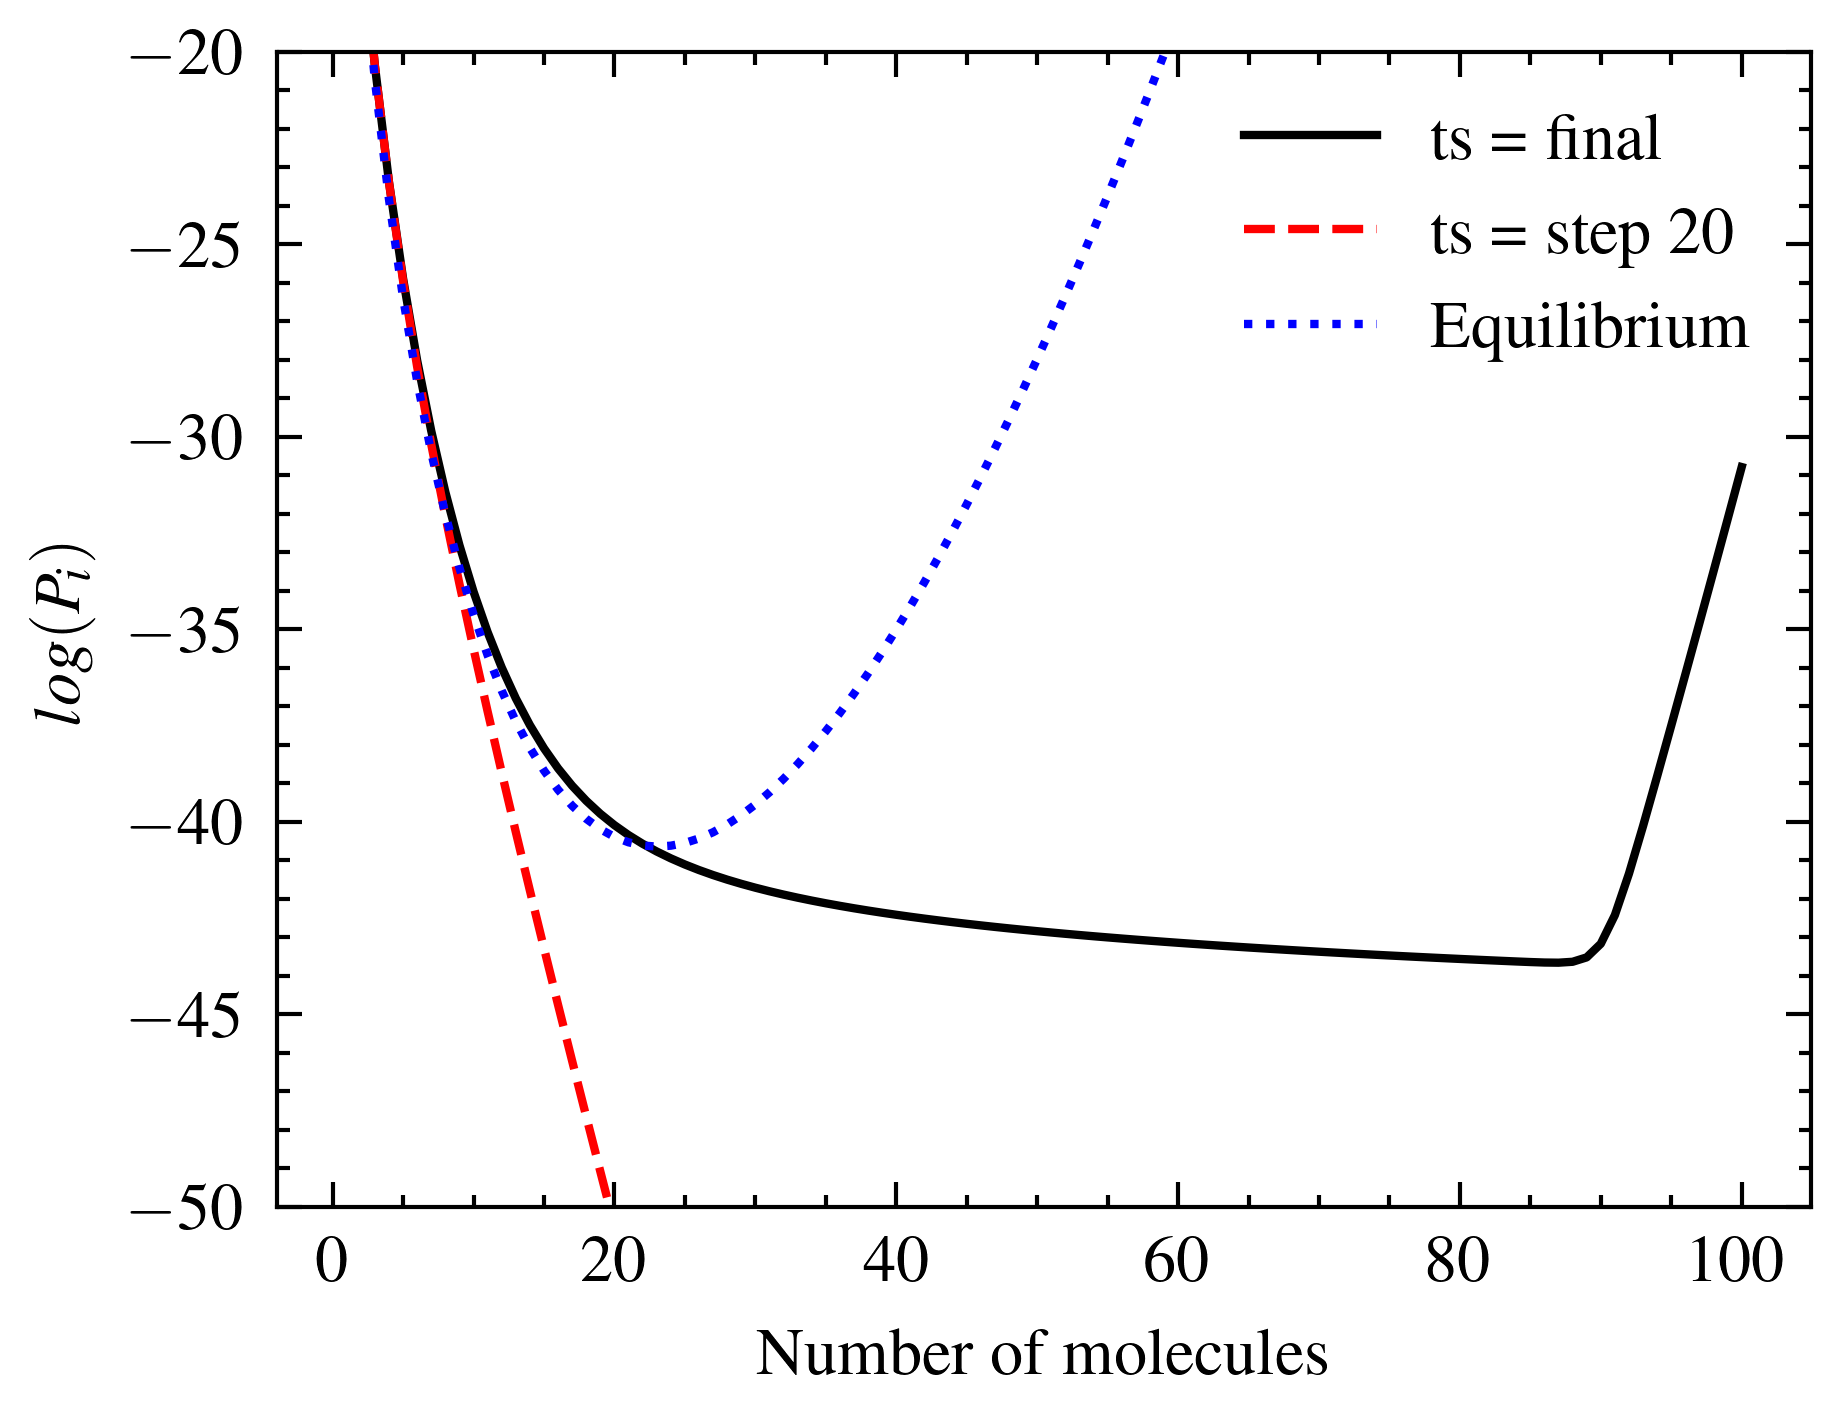

In [6]:
plt.figure()
n = np.linspace(1,100,100)
plt.plot(sim.number_molecules_array,np.log(sim.cluster_evolution[:,-1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = final')
plt.plot(sim.number_molecules_array,np.log(sim.cluster_evolution[:,20]/cluster_physics.AVOGADRO.magnitude), label = 'ts = step 20')
    #plt.plot(x_array[i],np.log(sim.cluster_evolution[:,100]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))

plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel(r'$log(P_i)$')
#plt.xlim(1,MAX_NUMBER_MOLECULES)
plt.ylim(-50,-20)


/tmp/ipykernel_31535/2729006377.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(sim2.number_molecules_array,np.log(sim2.cluster_evolution[:,20]/cluster_physics.AVOGADRO.magnitude), label = 'ts = step 20')


(-50.0, -20.0)

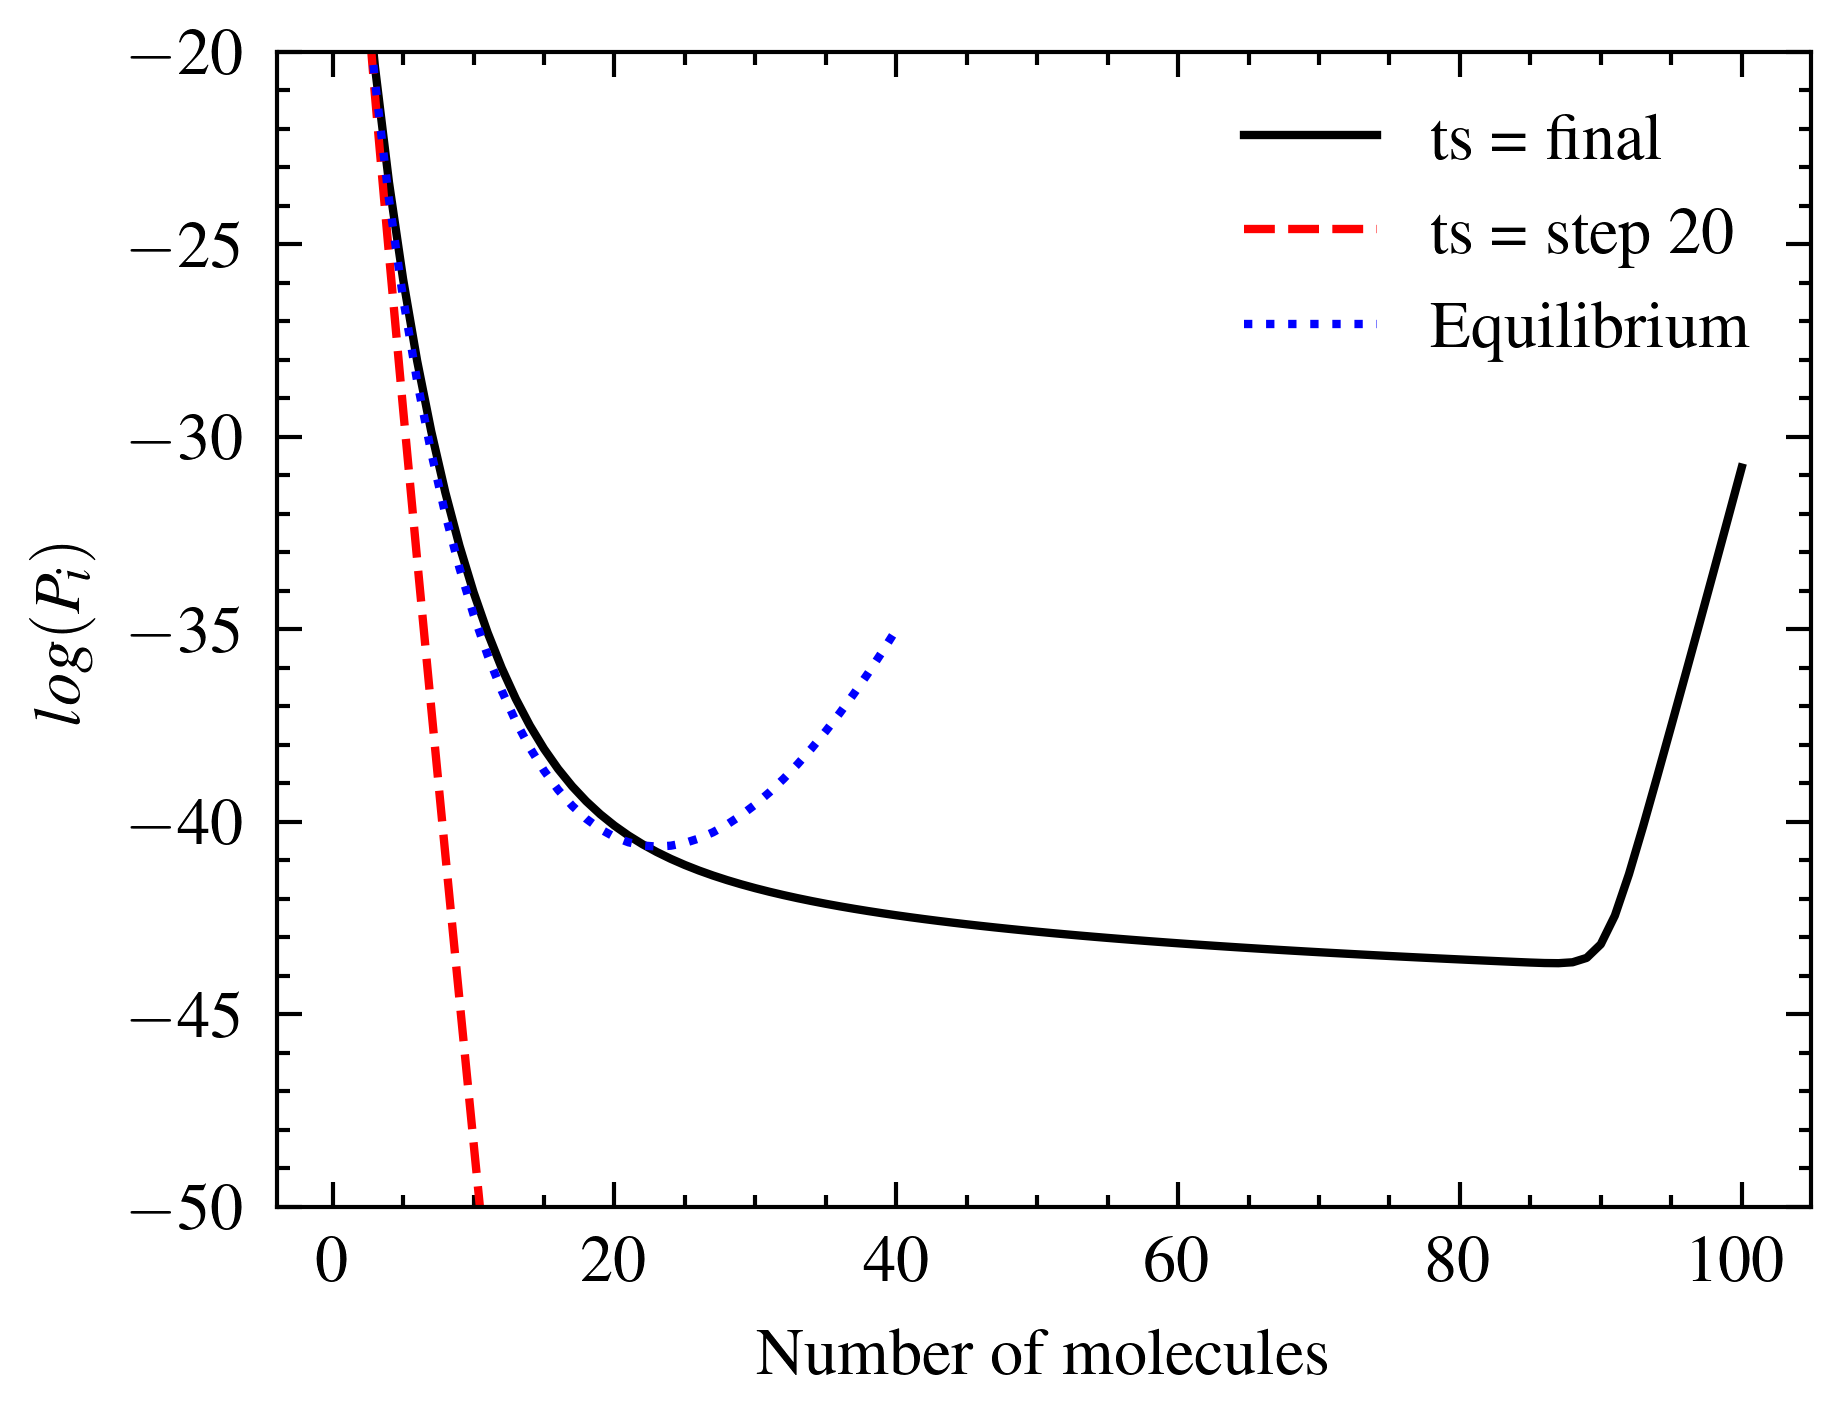

In [8]:
plt.figure()
n = np.linspace(1,40,40)
plt.plot(sim2.number_molecules_array,np.log(sim2.cluster_evolution[:,-1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = final')
plt.plot(sim2.number_molecules_array,np.log(sim2.cluster_evolution[:,20]/cluster_physics.AVOGADRO.magnitude), label = 'ts = step 20')
    #plt.plot(x_array[i],np.log(sim.cluster_evolution[:,100]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))

plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel(r'$log(P_i)$')
#plt.xlim(1,MAX_NUMBER_MOLECULES)
plt.ylim(-50,-20)


In [9]:
plt.figure()
plt.plot(sim.cluster_evolution[10,:], label = 'N=9')
plt.plot(sim.cluster_evolution[20,:], label = 'N=19')
plt.plot(sim.cluster_evolution[39,:], label = 'N=40')

plt.legend()
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Number of clusters')
plt.show()

: 

In [6]:
sim.cluster_evolution

array([[6.02214090e+23, 6.02214090e+23, 6.02214090e+23, ...,
        6.02214090e+23, 6.02214090e+23, 6.02214090e+23],
       [2.95378152e+21, 2.97098365e+21, 2.98782561e+21, ...,
        3.79638202e+21, 3.79638202e+21, 3.79638202e+21],
       [2.67973215e+16, 1.35676791e+18, 2.66750455e+18, ...,
        8.81199288e+19, 8.81199288e+19, 8.81199288e+19],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

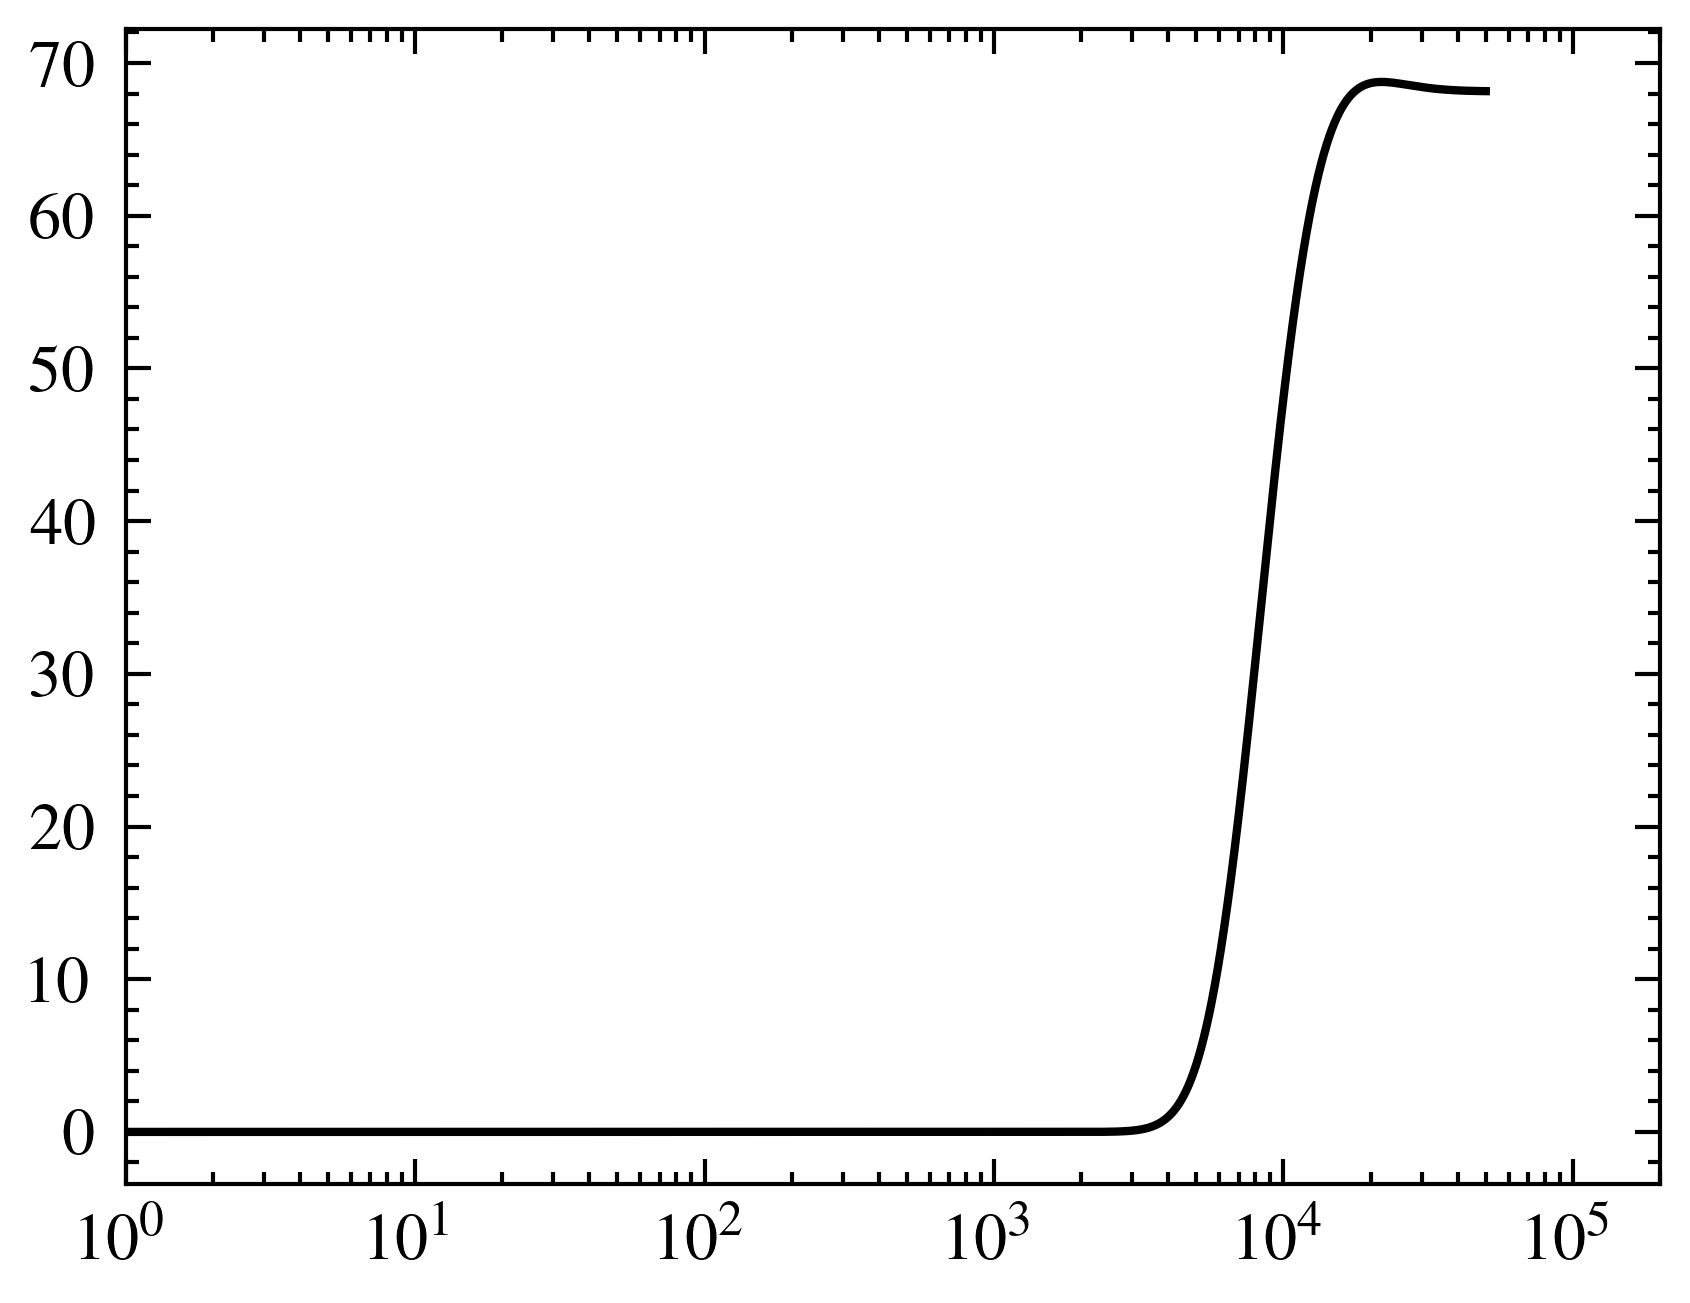

In [15]:
plt.figure()
#plt.plot(sim.rates_evolution.sum(axis=0))
plt.plot(1e-5*sim.rates_evolution[22:, :].sum(axis=0)/cluster_physics.unbiased_jump_rate.magnitude)
#plt.axhline(y = steady_state, color = 'green', linestyle = '--')
#plt.yscale('log')
plt.xlim(1,2e5)
plt.xscale('log')
#plt.yscale('log')
#plt.yscale('log')

(100000.0, 10000000000.0)

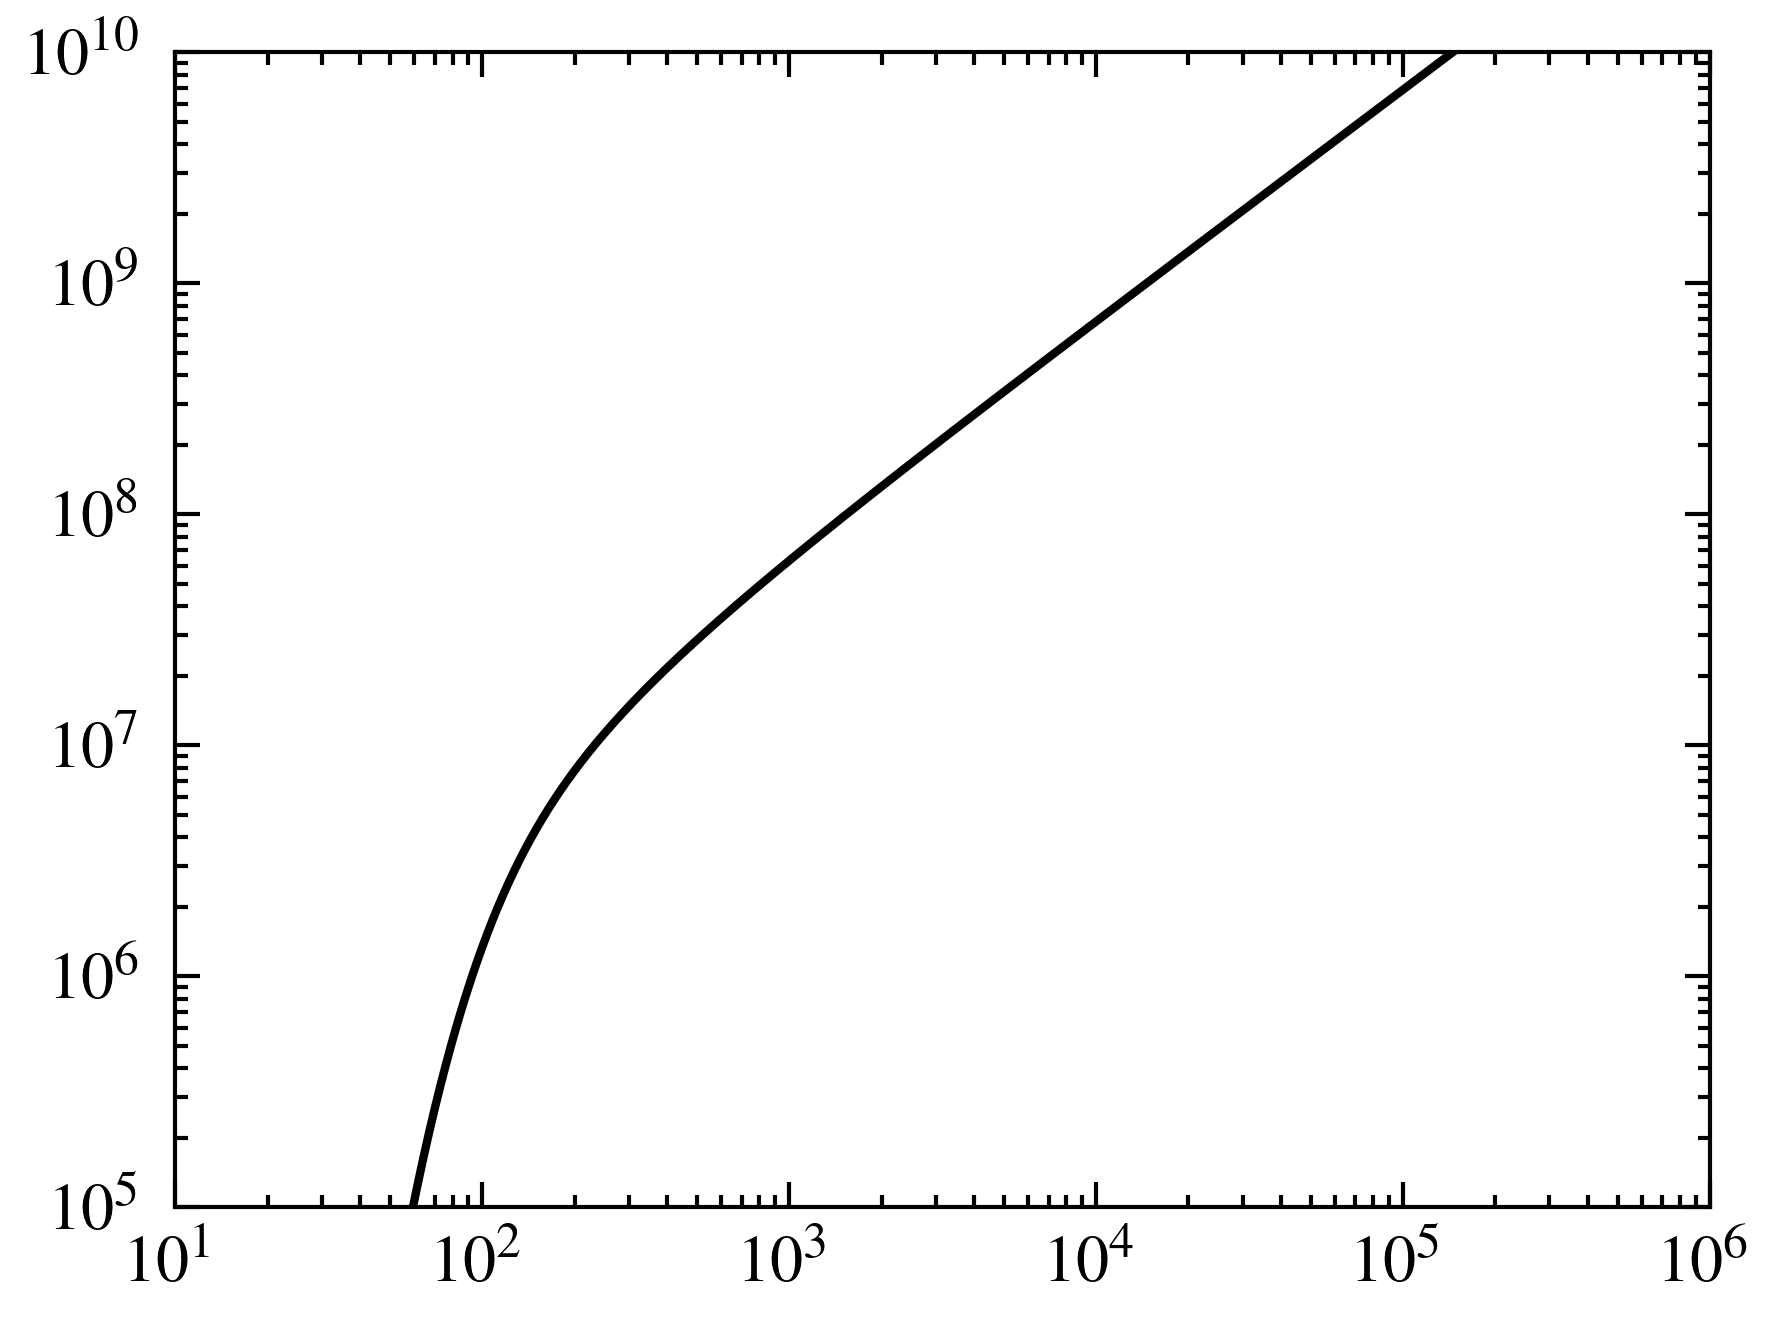

In [8]:
plt.figure()
#plt.plot(sim.rates_evolution.sum(axis=0))
plt.plot(sim.cluster_evolution[22:, :].sum(axis=0))
#plt.axhline(y = steady_state, color = 'green', linestyle = '--')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10,1e6)
plt.ylim(1e5,1e10)
#plt.yscale('log')
#plt.yscale('log')

In [12]:
suma_t = sim.rates_evolution.sum(axis=0)

# 'suma_t' es ahora un array con la suma de los valores para cada paso de tiempo
print(suma_t)

[4.18813201e-07 4.17950160e-07 4.17088943e-07 ... 8.66019096e-09
 8.64450195e-09 8.62884253e-09]


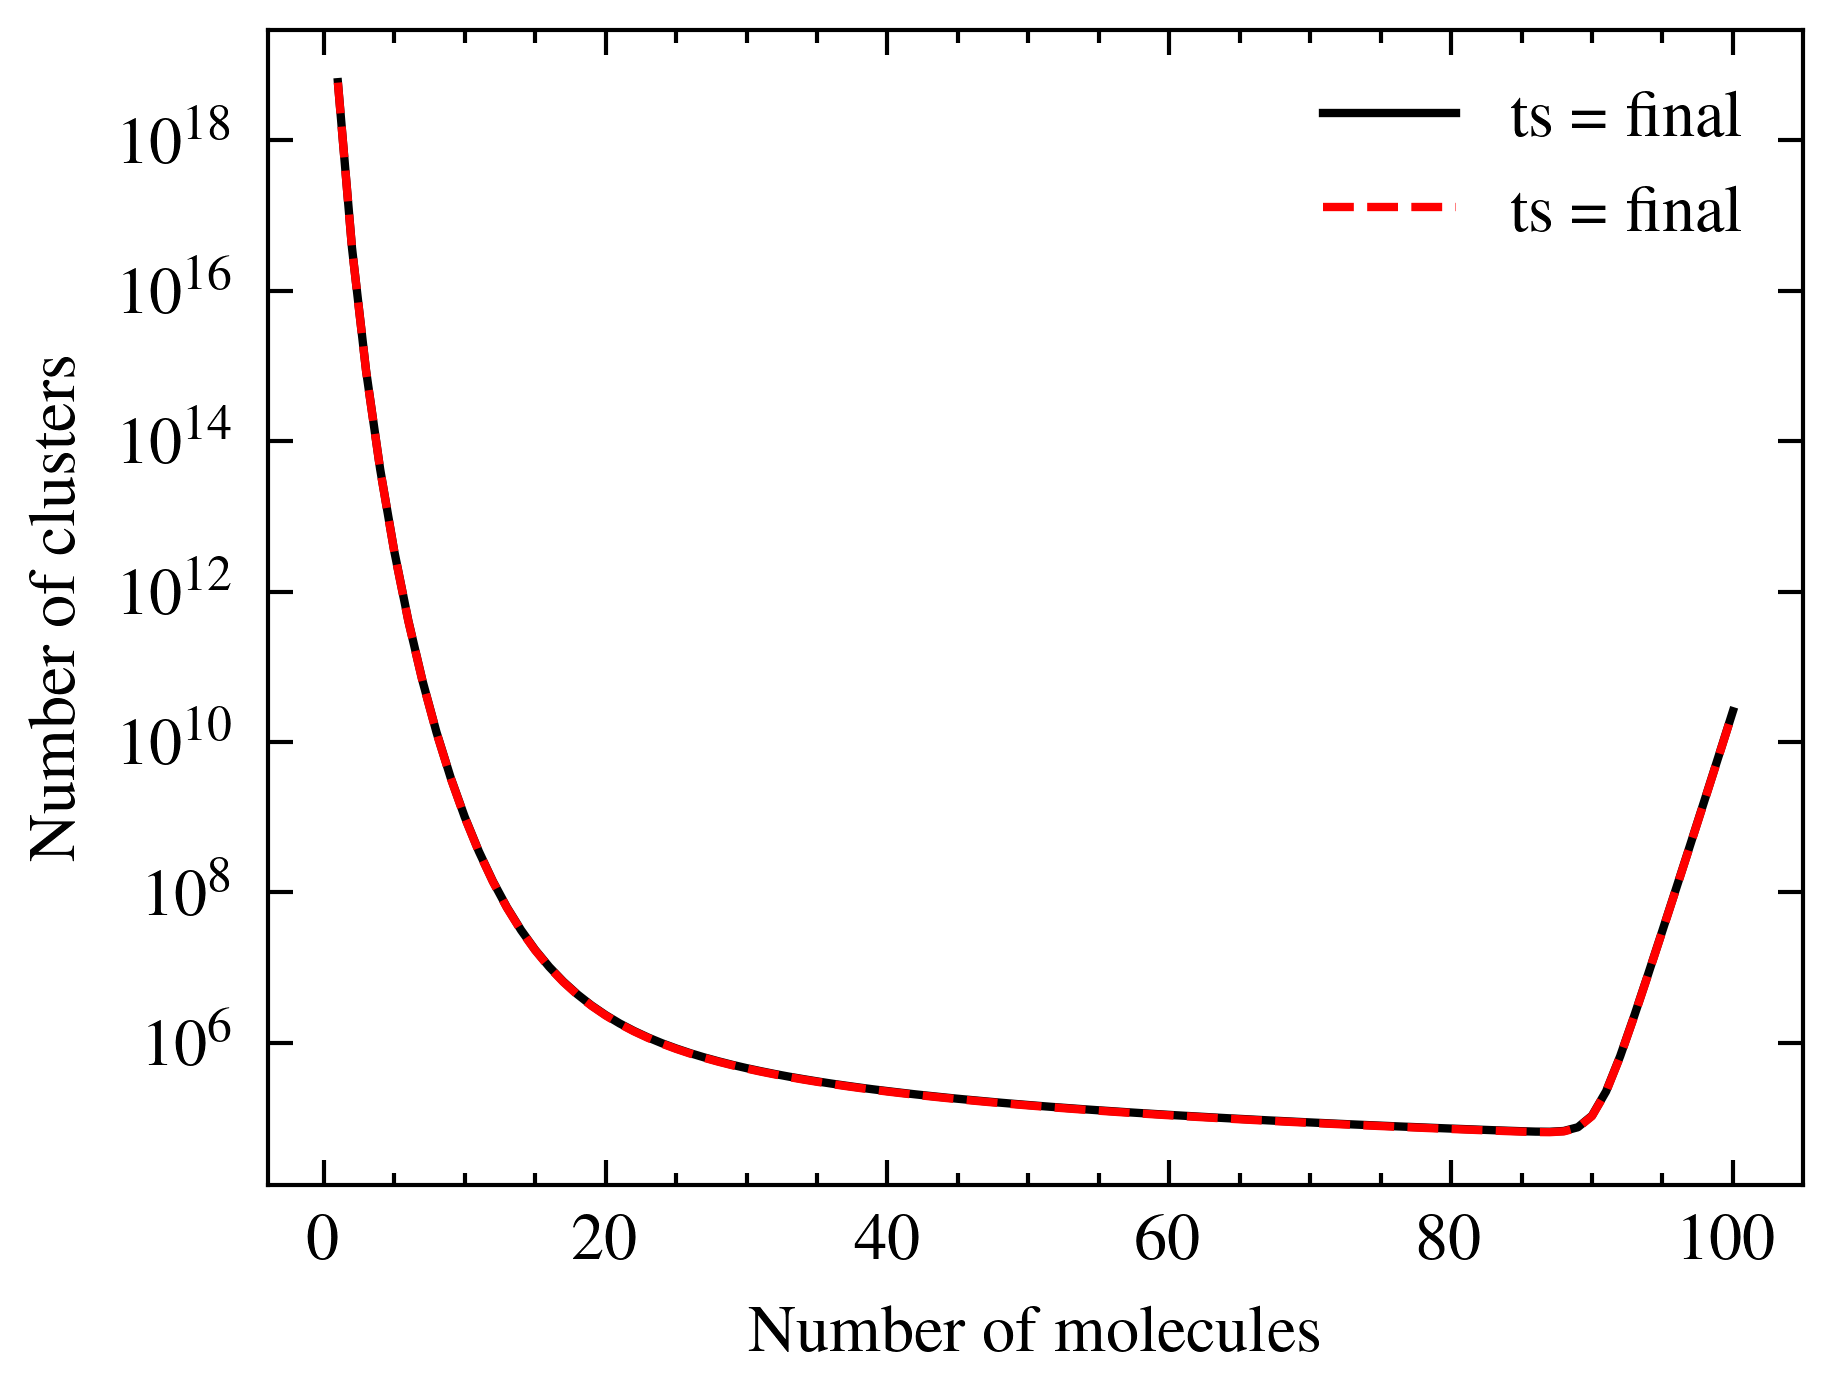

In [11]:
plt.figure()
n = np.linspace(1,500,500)
plt.plot(sim.number_molecules_array,(sim.cluster_evolution[:,-1]), label = 'ts = final')
plt.plot(sim2.number_molecules_array,(sim2.cluster_evolution[:,-1]), label = 'ts = final')
#plt.plot(n,(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')
plt.yscale('log')

